In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 1
!hostname
!pwd

dv003.bridges2.psc.edu
/ocean/projects/asc170022p/mtragoza/mre-pinn/MICCAI-2023


In [2]:
import sys, os, pathlib
import numpy as np
import xarray as xr
import torch
import matplotlib.pyplot as plt
import seaborn as sns

os.environ['DDEBACKEND'] = 'pytorch'
import deepxde

sys.path.append('..')
%aimport mre_pinn

torch.cuda.is_available()

Using backend: pytorch



True

In [ ]:
%autoreload
bioqic = mre_pinn.data.BIOQICFEMBox('../data/BIOQIC/downloads')
bioqic.download()
bioqic.load_mat()
bioqic.preprocess()
dataset = bioqic.to_dataset()
dataset.save_xarrays('../data/BIOQIC/fem_box')

Loading ../data/BIOQIC/fem_box/100/wave.nc
Loading ../data/BIOQIC/fem_box/100/mre.nc
Loading ../data/BIOQIC/fem_box/100/mre_mask.nc


<IPython.core.display.Javascript object>


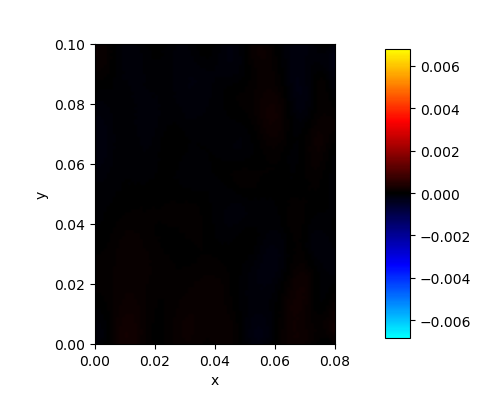

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

In [24]:
%autoreload
frequency = 100
example = mre_pinn.data.MREExample.load_xarrays('../data/BIOQIC/fem_box', frequency)
#example.add_gaussian_noise(0.001)
example.view('wave', ax_height=3)

In [8]:
example.metadata

size  spacing  origin  limit  center  extent
variable dimension                                              
wave     x            80    0.001     0.0  0.079  0.0395    0.08
         y           100    0.001     0.0  0.099  0.0495    0.10
         z            10    0.001     0.0  0.009  0.0045    0.01
mre      x            80    0.001     0.0  0.079  0.0395    0.08
         y           100    0.001     0.0  0.099  0.0495    0.10
         z            10    0.001     0.0  0.009  0.0045    0.01
mre_mask x            80    0.001     0.0  0.079  0.0395    0.08
         y           100    0.001     0.0  0.099  0.0495    0.10
         z            10    0.001     0.0  0.009  0.0045    0.01

In [9]:
example.describe()

dtype    count                     mean          std  \
variable component                                                              
wave     y          complex128  80000.0  -0.00000100-0.00000500j     0.000191   
         x          complex128  80000.0   0.00003800-0.00004900j     0.000192   
         z          complex128  80000.0  -0.00008600+0.00000600j     0.003931   
mre      scalar     complex128  80000.0  3382.375000+628.318531j  1590.727619   
mre_mask scalar          int64  80000.0   1.07650000+0.00000000j     0.362143   

                                        min                      25%  \
variable component                                                     
wave     y          -0.00030500+0.00004300j  -0.00005200+0.00011100j   
         x          -0.00043400-0.00022700j  -0.00001500+0.00003700j   
         z          -0.00992300+0.00235900j  -0.00131600-0.00074800j   
mre      scalar     3000.000000+628.318531j  3000.000000+628.318531j   
mre_mask scalar      1.00000000+0.00000000j   1.00000000+0.00000000j   

                                        50%                      75%  \
variable component                                                     
wave     y          -0.00000600+0.00003100j   0.00004600+0.00004500j   
         x           0.00003600+0.00015600j   0.00009700-0.00016000j   
         z          -0.00005800-0.00051100j   0.00109500-0.00054600j   
mre      scalar     3000.000000+628.318531j  3000.000000+628.318531j   
mre_mask scalar      1.00000000+0.00000000j   1.00000000+0.00000000j   

                                         max  
variable component                            
wave     y          0.000291000-0.000004000j  
         x          0.000466000-0.000245000j  
         z          0.008269000+0.002027000j  
mre      scalar     10000.000000+628.318531j  
mre_mask scalar     5.000000000+0.000000000j

Evaluating direct baseline
Evaluating FEM baseline
100%|██████████| 10/10 [00:30<00:00,  3.00s/it]


<IPython.core.display.Javascript object>


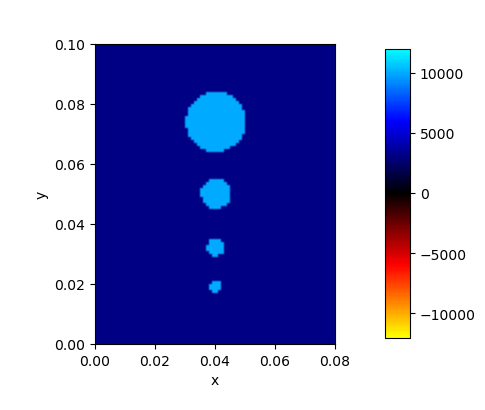

interactive(children=(SelectionSlider(description='part', options=(('abs', 0), ('angle', 1)), value=0), Select…

<IPython.core.display.Javascript object>


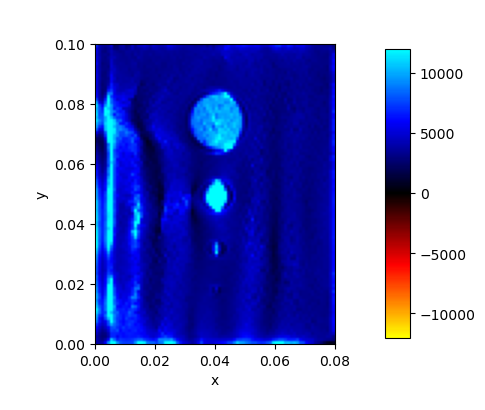

interactive(children=(SelectionSlider(description='part', options=(('abs', 0), ('angle', 1)), value=0), Select…

<IPython.core.display.Javascript object>


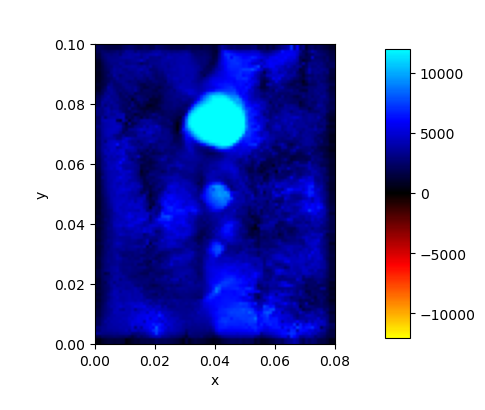

interactive(children=(SelectionSlider(description='part', options=(('abs', 0), ('angle', 1)), value=0), Select…

In [36]:
%autoreload
mre_pinn.baseline.eval_ahi_baseline(example, frequency=frequency)
mre_pinn.baseline.eval_fem_baseline(example, frequency=frequency, hetero=False)
example.view('mre', 'direct', 'fem', ax_height=3, polar=True, vmax=12e3)

In [37]:
example.vars()

dict_keys(['wave', 'mre', 'mre_mask', 'Lu', 'direct', 'fem'])

In [38]:
pde = mre_pinn.pde.WaveEquation.from_name('hetero', omega=frequency, detach=True)

In [56]:
%autoreload
pinn = mre_pinn.model.MREPINN(
    example,
    omega=60,
    n_layers=10,
    n_hidden=16,
    polar_input=False
)
pinn

MREPINN(
  (u_pinn): PINN(
    (hidden0): Linear(in_features=3, out_features=16, bias=True)
    (hidden1): Linear(in_features=19, out_features=16, bias=True)
    (hidden2): Linear(in_features=35, out_features=16, bias=True)
    (hidden3): Linear(in_features=51, out_features=16, bias=True)
    (hidden4): Linear(in_features=67, out_features=16, bias=True)
    (hidden5): Linear(in_features=83, out_features=16, bias=True)
    (hidden6): Linear(in_features=99, out_features=16, bias=True)
    (hidden7): Linear(in_features=115, out_features=16, bias=True)
    (hidden8): Linear(in_features=131, out_features=16, bias=True)
    (output): Linear(in_features=147, out_features=6, bias=True)
  )
  (mu_pinn): PINN(
    (hidden0): Linear(in_features=3, out_features=16, bias=True)
    (hidden1): Linear(in_features=19, out_features=16, bias=True)
    (hidden2): Linear(in_features=35, out_features=16, bias=True)
    (hidden3): Linear(in_features=51, out_features=16, bias=True)
    (hidden4): Linear(in_fe

In [57]:
%autoreload
model = mre_pinn.training.MREPINNModel(
    example, pinn, pde,
    loss_weights=[1, 0, 0, 1e-6],
    pde_warmup_iters=5000,
    pde_step_iters=5000,
    pde_init_weight=1e-10,
    n_points=1024
)
model.compile(optimizer='adam', lr=1e-4, loss=mre_pinn.training.losses.msae_loss)

Compiling model...
'compile' took 0.000275 s



In [51]:
%autoreload
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = False
model.benchmark(100)

# iterations: 100
Data time/iter:  0.0008s (0.76%)
Model time/iter: 0.0011s (0.97%)
Loss time/iter:  0.1097s (98.27%)
Total time/iter: 0.1117s
Total time: 11.1668s
1k iters time: 1.86m
10k iters time: 18.61m
100k iters time: 3.10h


<IPython.core.display.Javascript object>


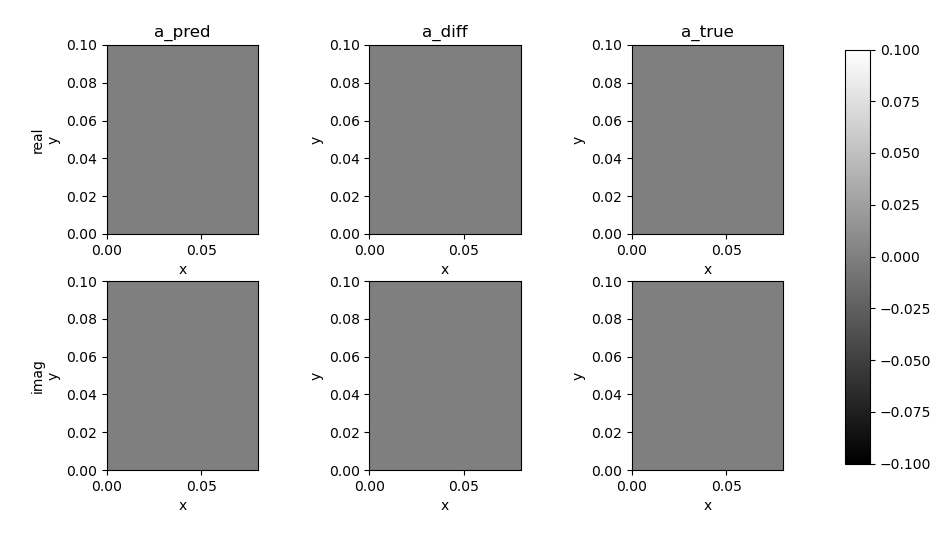

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

<IPython.core.display.Javascript object>


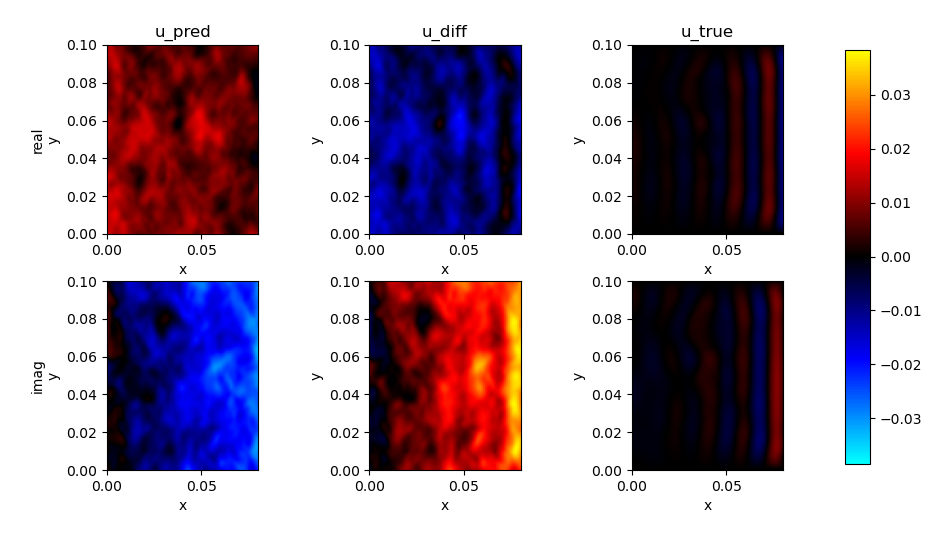

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

<IPython.core.display.Javascript object>


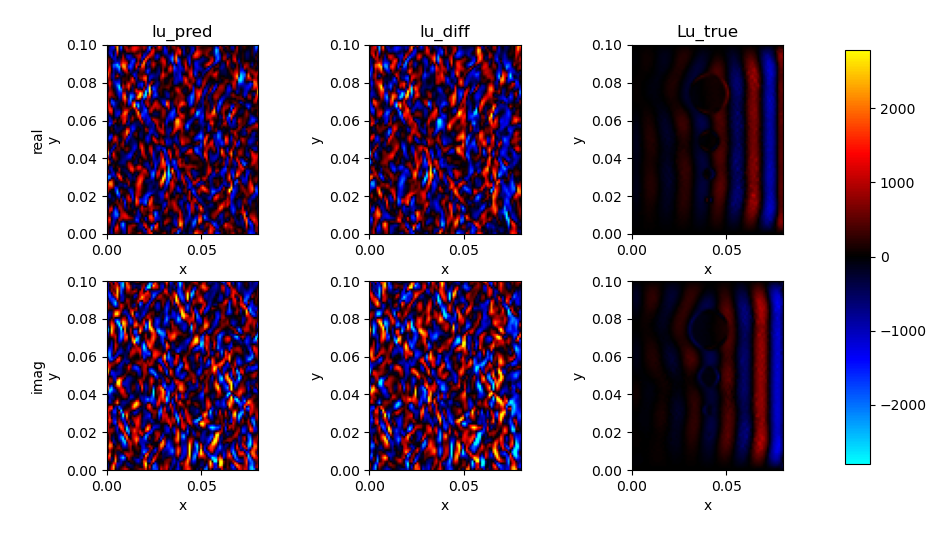

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

<IPython.core.display.Javascript object>


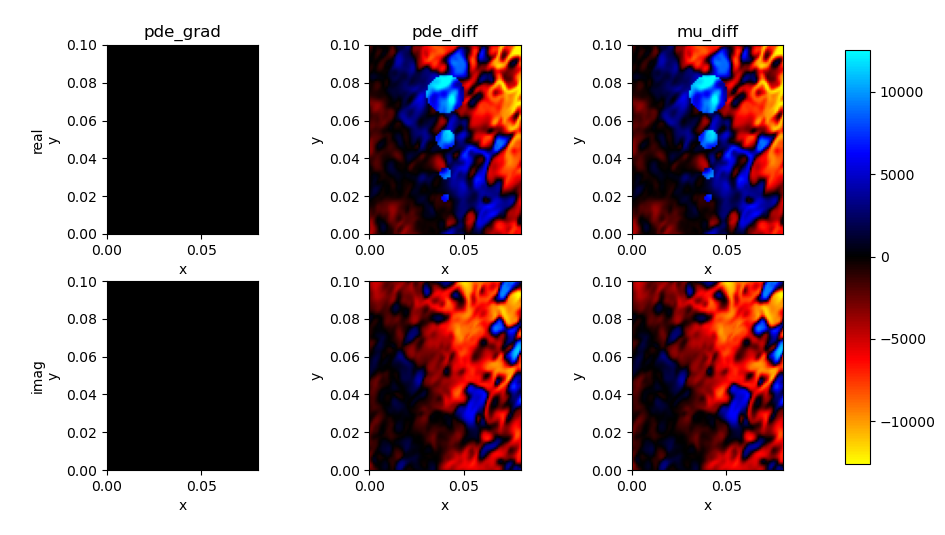

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

<IPython.core.display.Javascript object>


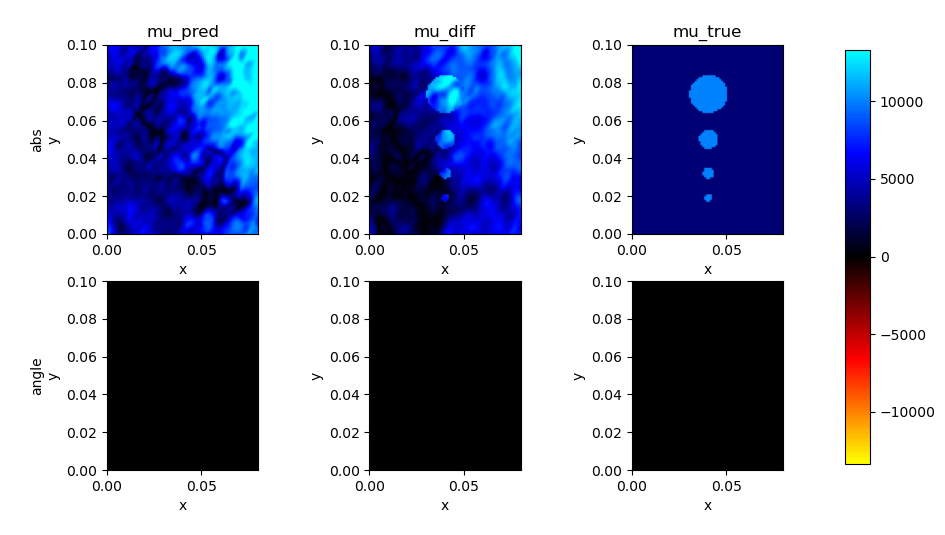

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

<IPython.core.display.Javascript object>


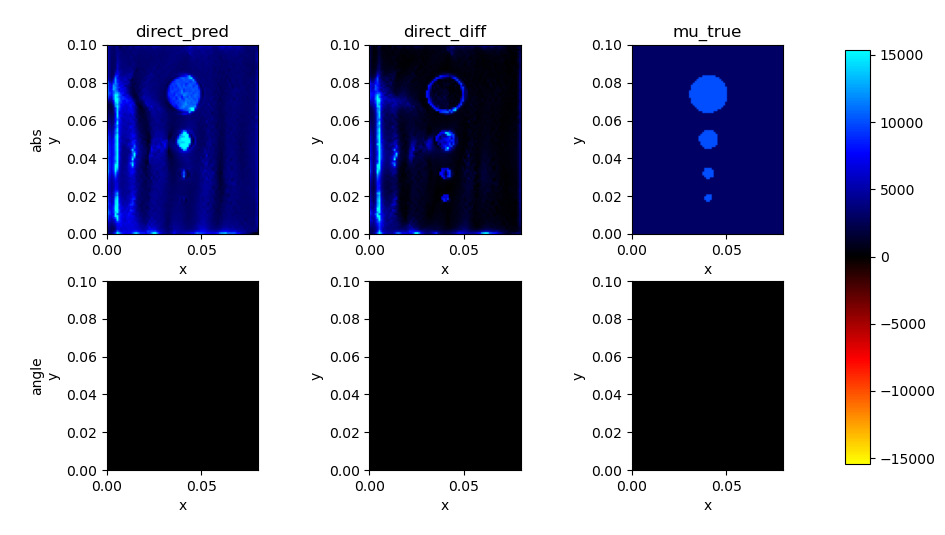

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

<IPython.core.display.Javascript object>


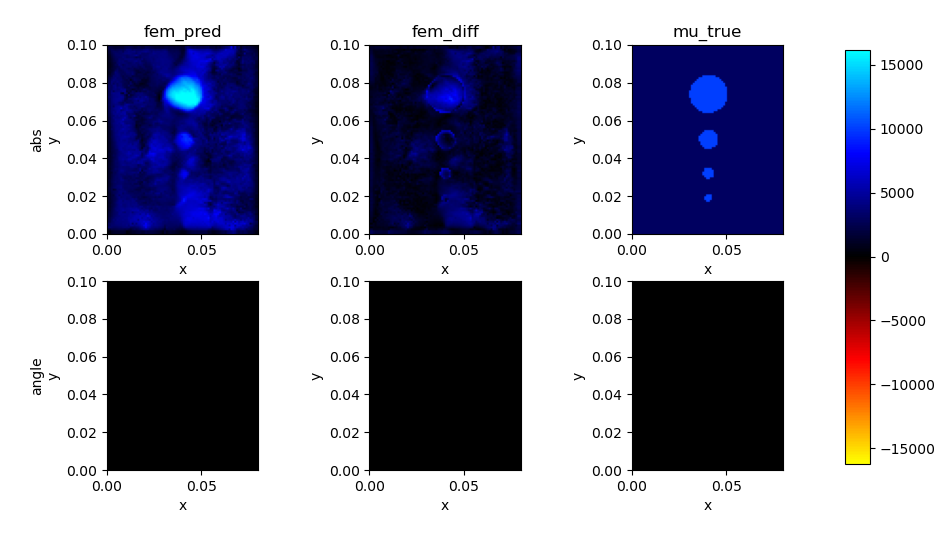

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

In [58]:
%autoreload
test_eval = mre_pinn.testing.TestEvaluator(test_every=100, interact=True)
test_eval.model = model
test_eval.test()

Training model...

0         [1.32e-04, 0.00e+00, 0.00e+00, 0.00e+00]    [1.33e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  


<IPython.core.display.Javascript object>


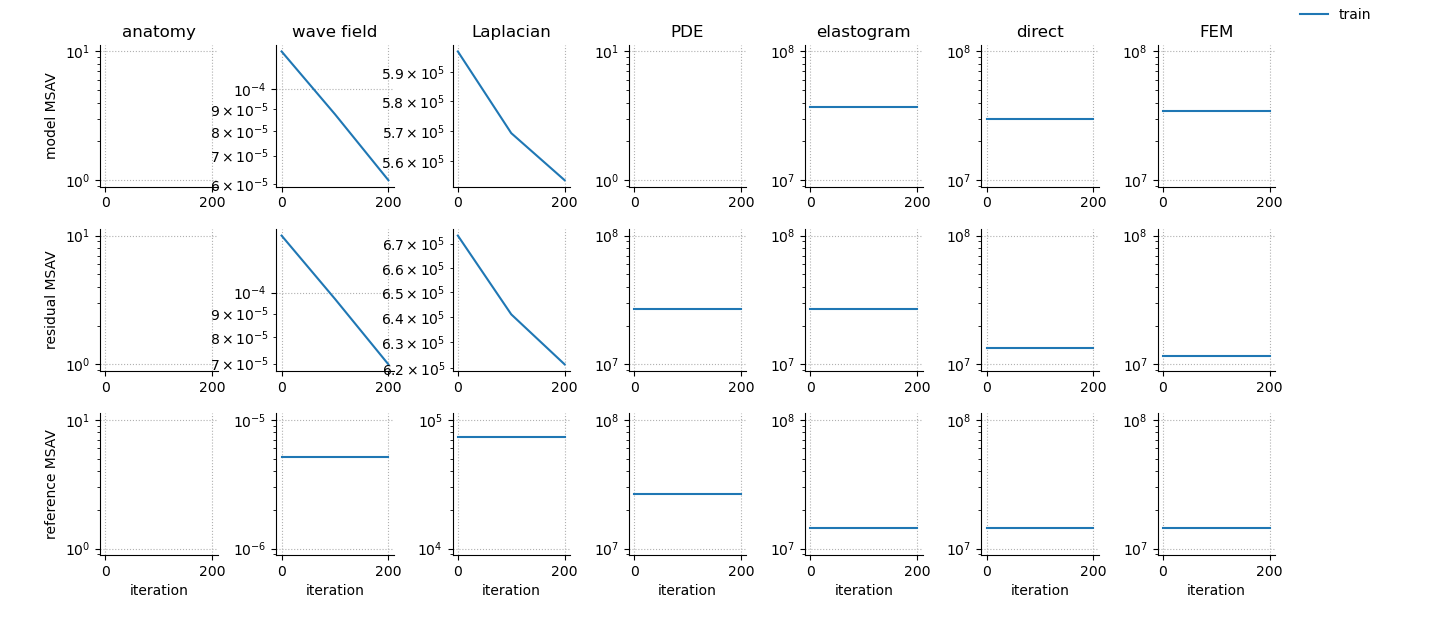

  ax.set_yscale(yscale)

  ax.set_yscale(yscale)

  ax.set_yscale(yscale)

  ax.set_yscale(yscale)



<IPython.core.display.Javascript object>


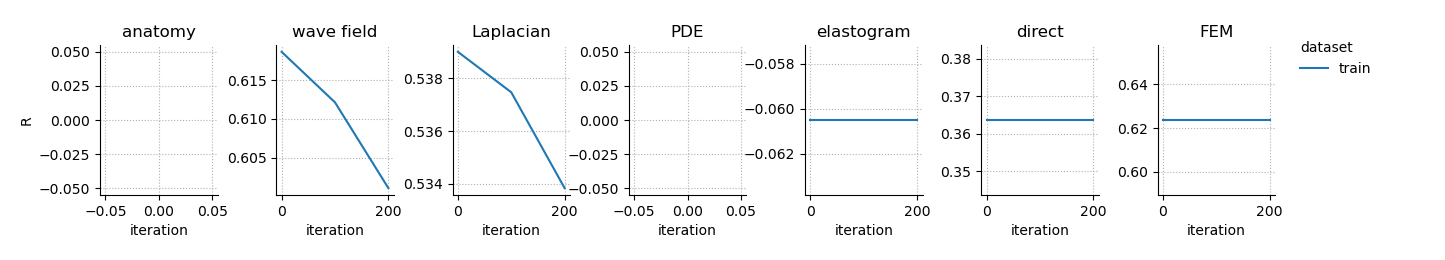

<IPython.core.display.Javascript object>


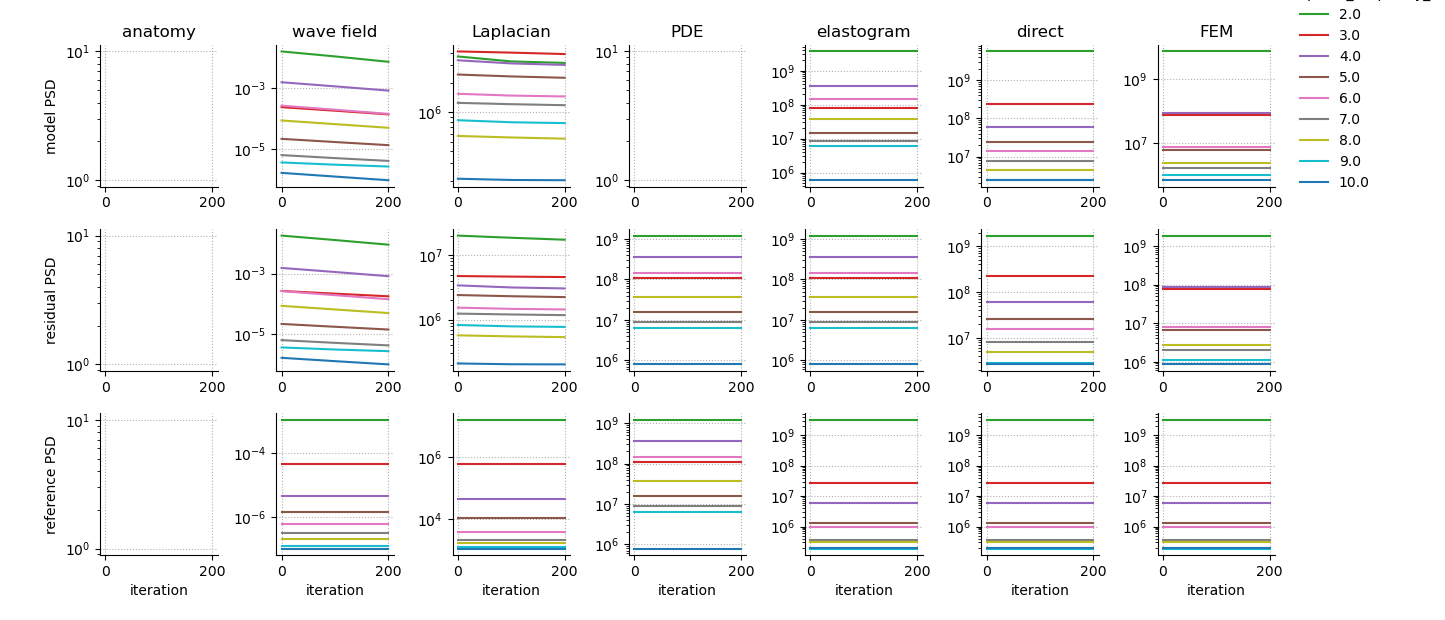

  ax.set_yscale(yscale)

  ax.set_yscale(yscale)

  ax.set_yscale(yscale)

  ax.set_yscale(yscale)



<IPython.core.display.Javascript object>


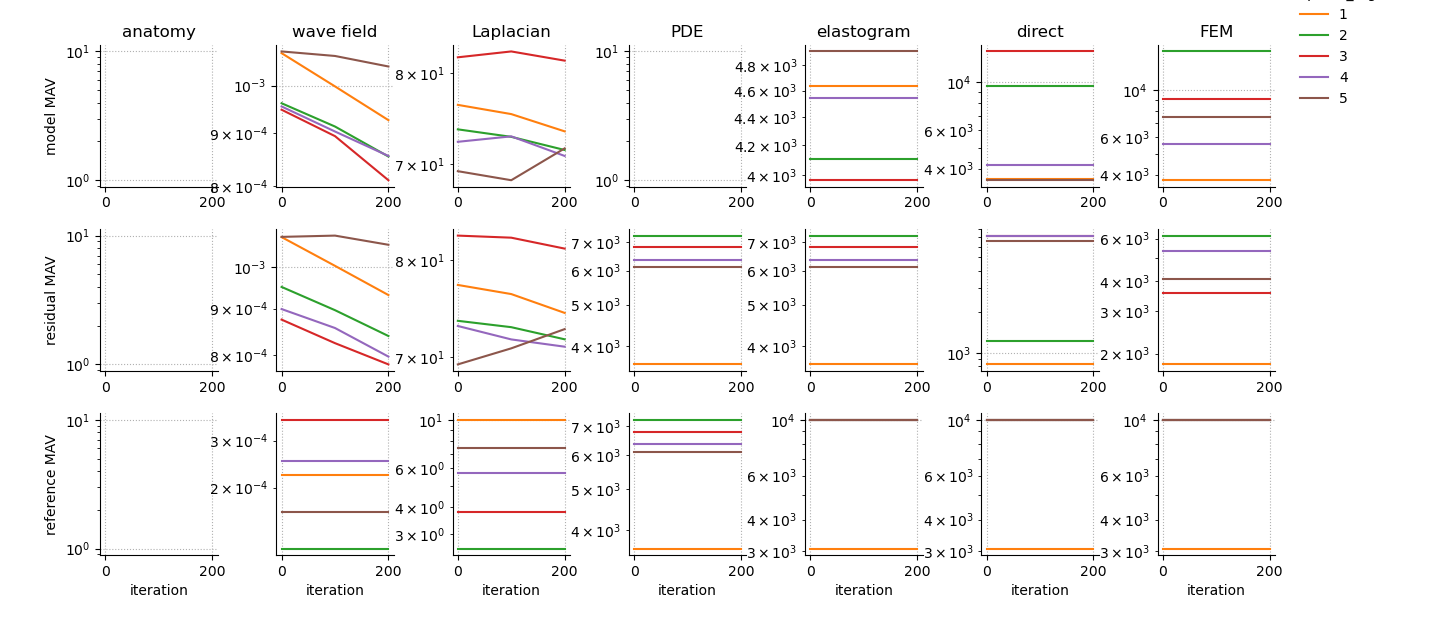

  ax.set_yscale(yscale)

  ax.set_yscale(yscale)

  ax.set_yscale(yscale)

  ax.set_yscale(yscale)



Time spent testing: 32.2547 (38.30%)
10        [1.29e-04, 0.00e+00, 0.00e+00, 0.00e+00]    [1.29e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  
20        [1.27e-04, 0.00e+00, 0.00e+00, 0.00e+00]    [1.25e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  
30        [1.17e-04, 0.00e+00, 0.00e+00, 0.00e+00]    [1.21e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  
40        [1.20e-04, 0.00e+00, 0.00e+00, 0.00e+00]    [1.17e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  
50        [1.18e-04, 0.00e+00, 0.00e+00, 0.00e+00]    [1.13e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  
60        [1.13e-04, 0.00e+00, 0.00e+00, 0.00e+00]    [1.10e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  
70        [1.10e-04, 0.00e+00, 0.00e+00, 0.00e+00]    [1.06e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  
80        [1.01e-04, 0.00e+00, 0.00e+00, 0.00e+00]    [1.03e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  
90        [9.98e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [1.00e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  
100       [9.25e-05, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.1122 (47.83%)
110       [9.57e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [9.38e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
120       [9.14e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [9.09e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
130       [8.68e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [8.80e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
140       [8.36e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [8.52e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
150       [8.02e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [8.25e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
160       [8.19e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [7.99e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
170       [7.81e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [7.73e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
180       [7.58e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [7.49e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
190       [6.99e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [7.24e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
200       [6.88e-05, 0.00e+00, 0.00e

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()

  self.axes[i,j].autoscale_view()



Time spent testing: 29.3059 (52.72%)
210       [6.88e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [6.78e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
220       [6.34e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [6.57e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
230       [6.17e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [6.36e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
240       [6.21e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [6.15e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
250       [5.94e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [5.96e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
260       [5.70e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [5.76e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
270       [5.24e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [5.57e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
280       [5.54e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [5.39e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
290       [5.04e-05, 0.00e+00, 0.00e+00, 0.00e+00]    [5.22e-05, 0.00e+00, 0.00e+00, 0.00e+00]    []  
300       [5.04e-05, 0.00e+00, 0.00e

In [ ]:
%autoreload
model.train(200000, display_every=10, callbacks=[test_eval])